# Data Augmentation Test 1
##### The data augmentation operations in this experiment involve a large number of parameters and data samples. Therefore, for the data augmentation effect of different parameters or methods, this study has done a large number of experiments to select the suitable methods and parameters for the purpose of the study.

### Here is some of the test code

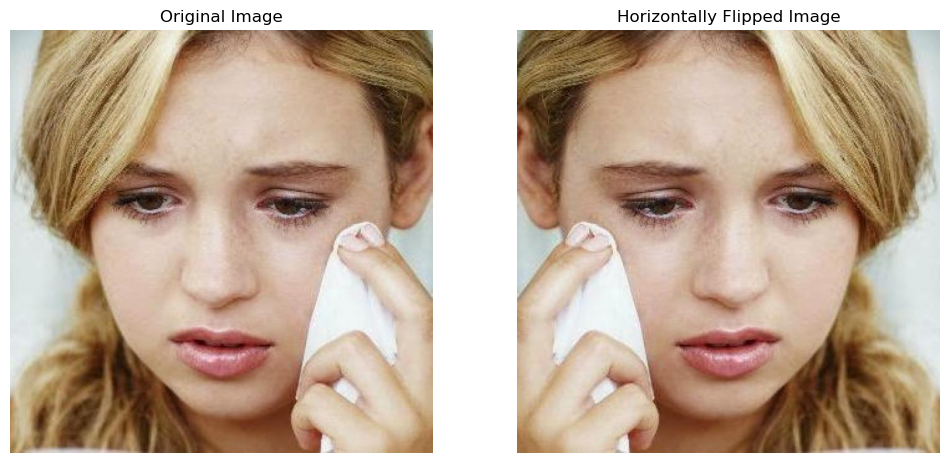

In [1]:
import cv2
import matplotlib.pyplot as plt
import albumentations as A

image = cv2.imread('/Users/piglet/Desktop/Project_Code/jupyter_notebook/Original Image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

horizontal_flip = A.HorizontalFlip(p=1)

transformed = horizontal_flip(image=image)
transformed_image = transformed['image']
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(transformed_image)
ax[1].set_title('Horizontally Flipped Image')
ax[1].axis('off')

plt.show()


### Modify parameters and methods here

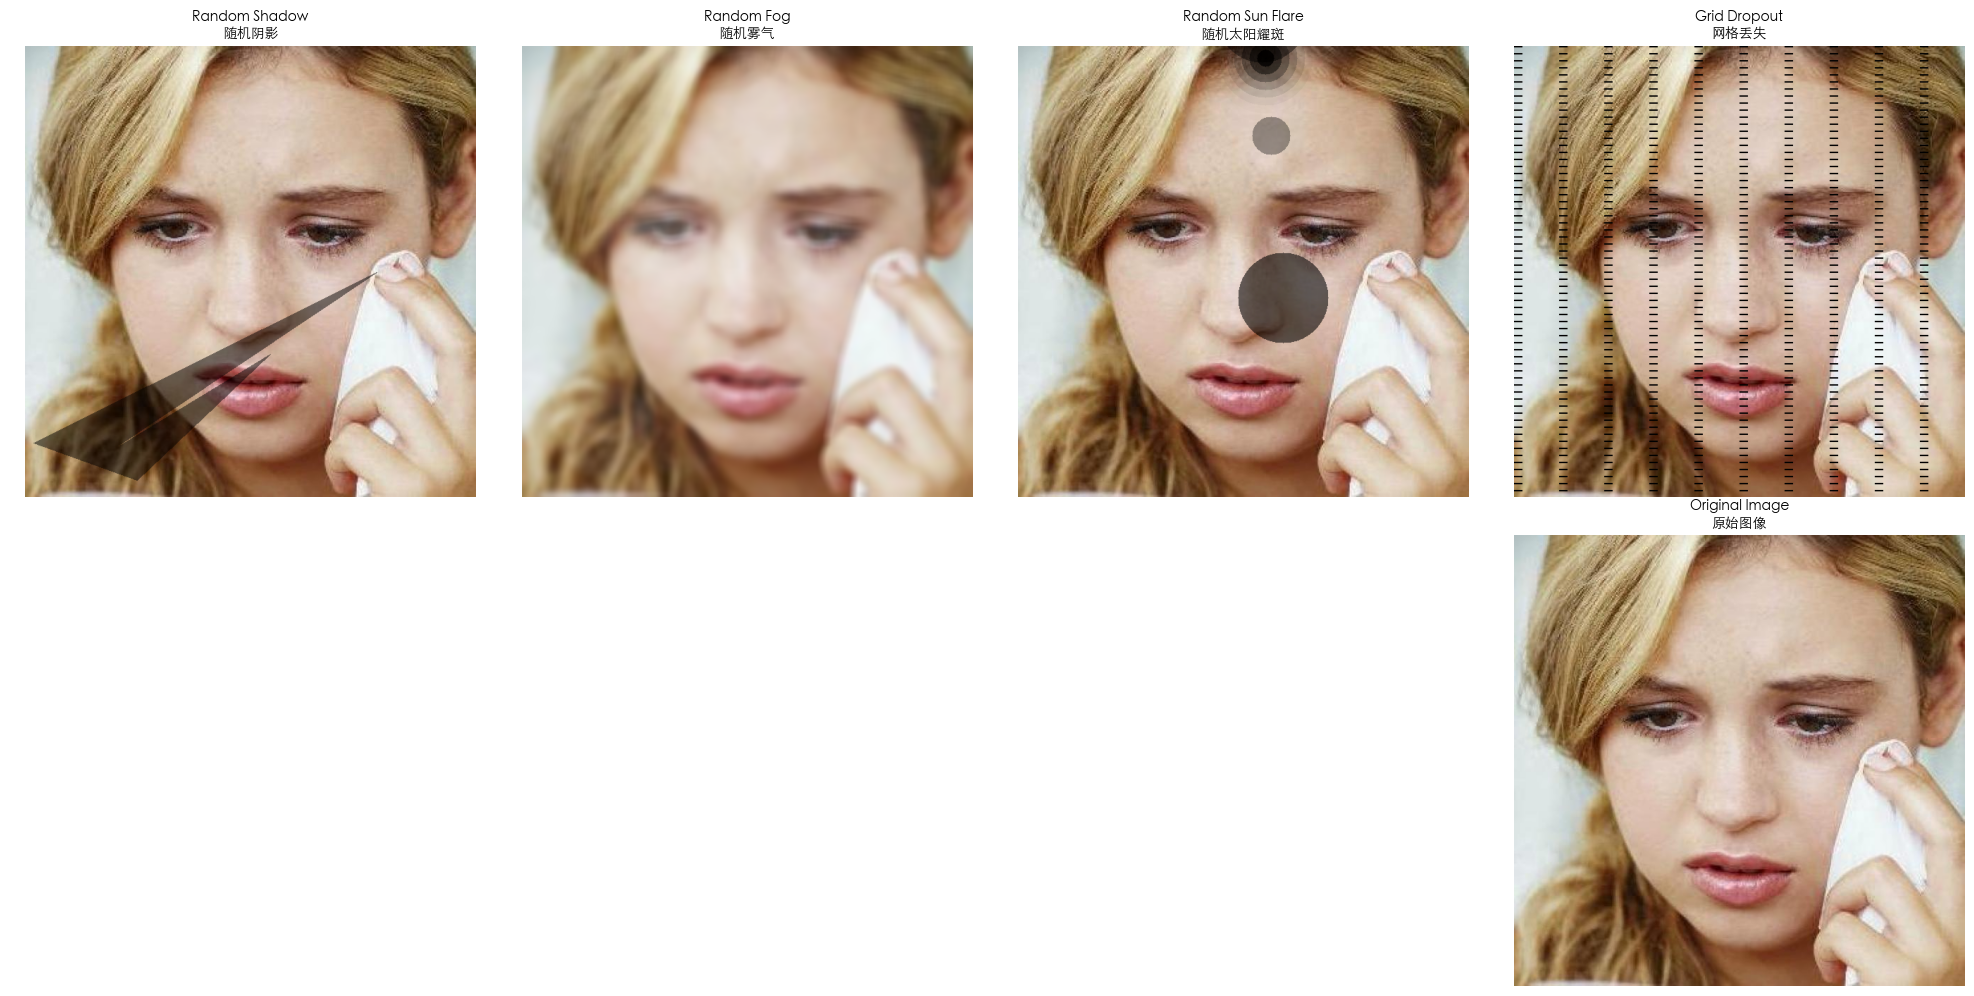

In [14]:
import matplotlib.font_manager as fm

image_path = "/Users/piglet/Desktop/Project_Code/jupyter_notebook/Original Image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

zh_font = fm.FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc')  # Appropriate for macOS

# 
transforms = [
    ("Random Shadow", A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_lower=1, num_shadows_upper=1, shadow_dimension=2, p=1)),
    ("Random Fog", A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.7, alpha_coef=0.1, p=1)),
    ("Random Sun Flare", A.RandomSunFlare(flare_roi=(0, 0, 1, 0.5), angle_lower=0, angle_upper=1, num_flare_circles_lower=6, num_flare_circles_upper=6, src_radius=100, src_color=(0, 0, 0), p=1)),
    ("Grid Dropout", A.GridDropout(ratio=0.2, p=1))
]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for idx, (name, transform) in enumerate(transforms):
    augmented_image = transform(image=image)['image']
    row, col = divmod(idx, 4)
    axes[row, col].imshow(augmented_image)
    axes[row, col].set_title(name, fontproperties=zh_font)
    axes[row, col].axis('off')

axes[1, 3].imshow(image)
axes[1, 3].set_title("Original Image", fontproperties=zh_font)
axes[1, 3].axis('off')

if len(transforms) < 7:
    for idx in range(len(transforms), 7):
        row, col = divmod(idx, 4)
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()
